In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [55]:
import tensorflow as tf
from tensorflow.keras.losses import mse, mae
from tensorflow.keras.optimizers import Adam

tf.__version__

'2.1.0'

In [4]:
housing = pd.read_csv('./kc_house_data.csv')
sample = pd.read_csv('./loss_price.csv')

In [6]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Input data

## Load data using pandas

In [8]:
housing.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Setting the data type

In [15]:
# use a numpy array to define price as float32
price = housing['price'].to_numpy(dtype=np.float32)

# define waterfront as a boolean using tf.cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

print(type(price))
print(type(waterfront))

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


# Loss functions

## Loss functions in `tensorflow`

In [19]:
sample.columns

Index(['price', 'pred'], dtype='object')

In [20]:
price = sample['price'].to_numpy()
pred = sample['pred'].to_numpy()

In [23]:
# compute the mean squared error (mse)
loss = mse(price, pred)
print(f'mse: {loss}')
loss = mae(price, pred)
print(f'mae: {loss}')

mse: 141171604777.12717
mae: 268827.9930208799


## Modifying the loss function

In [25]:
features = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
targets = tf.constant([2, 4, 6, 8, 10], dtype=tf.float32)

In [26]:
# initialize a variable named scalar
scalar = tf.Variable(1.0, dtype=tf.float32)

# define the model
def model(scalar, features=features):
    return scalar * features

# define a loss fxn
def loss_fxn(scalar, features=features, targets=targets):
    # compute predicted values
    preds = model(scalar, features)
    
    # return mae
    return mae(targets, preds)

# eval loss fxn
print(loss_fxn(scalar).numpy())

3.0


# Linear Regression

## Set up a linear regression

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


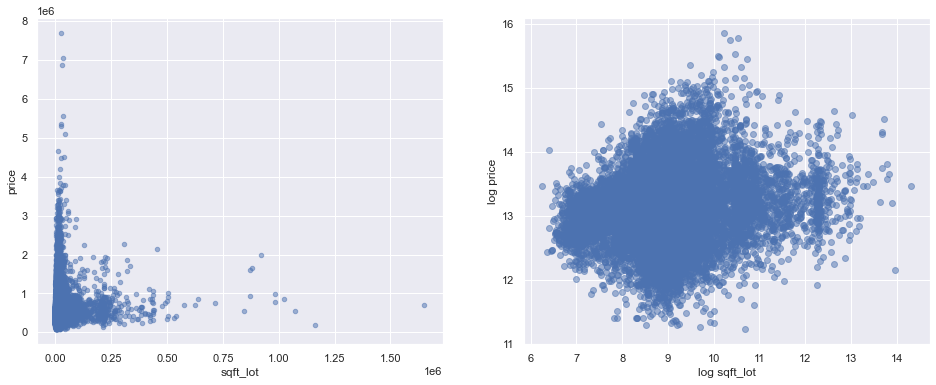

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

housing.plot(x='sqft_lot',
             y='price',
             kind='scatter',
             alpha=0.5,
             ax=ax1)

ax2.scatter(x=np.log(housing['sqft_lot']),
            y=np.log(housing['price']),
            alpha=0.5)
ax2.set(xlabel='log sqft_lot',
        ylabel='log price')

plt.show()

In [66]:
log_size = np.log(housing['sqft_lot'].to_numpy(dtype=np.float32))
log_price = np.log(housing['price'].to_numpy(dtype=np.float32))
bedrooms = housing['bedrooms'].to_numpy(dtype=np.float32)

In [53]:
# define a linear regression model
def linear_regression(intercept, slope, features=log_size):
    return intercept + features*slope

# set loss_fxn to take variables as arguments
def loss_fxn(intercept, slope, features=log_size, targets=log_price):
    preds = linear_regression(intercept, slope, features)
    
    return mse(targets, preds)

In [54]:
print(loss_fxn(0.1, 0.1).numpy())
print(loss_fxn(0.1, 0.5).numpy())

145.44653
71.866


## Train a linear model

In [56]:
def plot_results(intercept, slope, x=log_size, y=log_price):
    minx, maxx = np.min(x), np.max(x)
    sizes = np.linspace(minx, maxx, 100)
    prices = [intercept + slope*xs for xs in sizes]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.scatter(x, y, alpha=0.5)
    ax.plot(sizes, prices, color='r', lw=3)
    ax.set(xlabel='log(size)',
           ylabel='log(price)',
           title='Scatterplot of data and fitted regression line')
    
    plt.show()

65.26133
1.4909142
2.3818178
2.9086726
2.6110873
1.7604784
1.3467994
1.3559676
1.288407
1.2425306


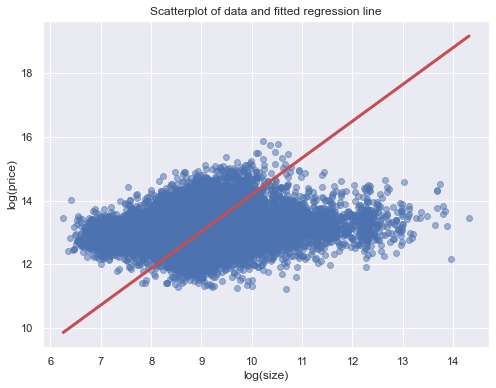

In [64]:
intercept = tf.Variable(0, dtype=np.float32)
slope = tf.Variable(0, dtype=np.float32)

# initialize an adam optimizer
opt = Adam(0.5)

for j in range(100):
    opt.minimize(lambda: loss_fxn(intercept, slope), 
                 var_list=[intercept, slope])
    
    if j % 10 == 0:
        print(loss_fxn(intercept, slope).numpy())

plot_results(intercept, slope)

## Multiple linear regression

In [70]:
# define the linear regression model
def linear_regression(params, feature1=log_size, feature2=bedrooms):
    return params[0] + feature1*params[1] + feature2*params[2]

# define loss_fxn
def loss_fxn(params, targets=log_price, feature1=log_size, feature2=bedrooms):
    preds = linear_regression(params, feature1, feature2)
    
    return mae(targets, preds)

def print_results(params):
    print(f'loss: {loss_fxn(params).numpy(): .3f},\nintercept: {params[0].numpy()},\nslope_1: {params[1].numpy()},\nslope_2: {params[2].numpy()}\n')

In [71]:
params = tf.Variable([0.05, 0.05, 0.05], dtype=tf.float32)
opt = Adam()
for j in range(5):
    opt.minimize(lambda: loss_fxn(params),
                 var_list=[params])
    print_results(params)

loss:  12.366,
intercept: 0.05100002884864807,
slope_1: 0.05100002884864807,
slope_2: 0.05100002884864807

loss:  12.353,
intercept: 0.05200003832578659,
slope_1: 0.05200003832578659,
slope_2: 0.05200003832578659

loss:  12.340,
intercept: 0.05300004035234451,
slope_1: 0.05300004035234451,
slope_2: 0.05300004035234451

loss:  12.326,
intercept: 0.054000042378902435,
slope_1: 0.054000046104192734,
slope_2: 0.054000042378902435

loss:  12.313,
intercept: 0.05500004440546036,
slope_1: 0.055000048130750656,
slope_2: 0.05500004440546036



# Batch training

## Preparing to batch train

In [77]:
# Define the intercept and slope
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
    # Define the predicted values
    return intercept + features*slope

# Define the loss function
def loss_function(intercept, slope, targets, features):
    # Define the predicted values
    preds = linear_regression(intercept, slope, features)
    
     # Define the MSE loss
    return mse(targets, preds)

## Training a linear model in batches

In [78]:
# Initialize adam optimizer
opt = Adam()

# Load data in batches
for batch in pd.read_csv('./kc_house_data.csv', chunksize=100):
    size_batch = batch['sqft_lot'].to_numpy(np.float32)

    # Extract the price values for the current batch
    price_batch = batch['price'].to_numpy(np.float32)

    # Complete the loss, fill in the variable list, and minimize
    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), 
                 var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016001
